# How to Develop LASSO Regression Models in Python

January 19, 2024

Objetivo:

* Lasso Regression es una extensión de la regresión lineal que agrega una penalización de regularización a la función de pérdida durante el entrenamiento.

* Cómo evaluar un modelo de regresión de Lasso y utilizar un modelo final para hacer predicciones de nuevos datos.

* Cómo configurar el modelo Lasso Regression para un nuevo conjunto de datos.

## Setup
#### Load Python libaries, etc.

In [2]:
#
# Dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from statsmodels.formula.api import ols
from scipy import stats
import plotly.express as px

#
import warnings
warnings.filterwarnings('ignore')

## Lasso Regression

El objetivo es econtrar los valores de $\hat{\boldsymbol{\beta}}^{Lasso}$ que resulta de:
$$\hat{\boldsymbol{\beta}}^{Lasso} = \min_{\boldsymbol{\beta}} \left[ \sum_{i = 1}^n (y_i - \mathbf{X}_i \boldsymbol{\beta})^2 + \lambda \sum_{k = 2}^K |\beta_k| \right]$$

Donde $\lambda \geq 0$ y suponemos que $\beta_1$ es el término constante de la regresión. El término constante se estima considerando que este toma el valor de la media de $Y$ dado por: $\overline{Y} = \frac{\sum_{i = 1}^{n} y_i}{n}$.

## Lectura de Data

Los datos utilizados corresponden a precios de venta de inmuebles en la CDMX recolectados de la web de Inmuebles 24 en mayo de 2020. 

In [3]:
# Data

Venta = pd.read_csv('Ventas.csv')

Venta.tail()

name  \
45319                  Cumbres de Santa Fe Casa en Venta   
45320  Casa Club de Golf Bosques de Santa Fe/ Proyect...   
45321                                   Santa Fe La Loma   
45322          Exclusiva Residencia Rancho San Francisco   
45323  Moderna y Espectacular Residencia Rancho San F...   

                                                location  \
45319    Avenida de los Poetas, Santa Fe, Alvaro Obregón   
45320  CLUB DE GOLF BOSQUES DE SANTA FE, Club de Golf...   
45321  Bernardo Quintana  No. 75  Patios I, Lomas de ...   
45322  RANCHO SAN FRANCISCO , Rancho San Francisco Pu...   
45323  San Francisco 00, San Bartolo Ameyalco, Alvaro...   

                                             description  \
45319  Gran proyecto de casa en cumbres, acabados aaa...   
45320  En calle cerrada magnífica residencia de los a...   
45321  Casa en la Loma de Santa Fe Los Patios I, Proy...   
45322  Espectacular residencia, viva rodeado de bosqu...   
45323  Residencia moderna, única en Rancho San Franci...   

                                                    link          price  \
45319  /propiedades/cumbres-de-santa-fe-casa-en-venta...  USD 2,850,000   
45320  /propiedades/casa-club-de-golf-bosques-de-sant...  USD 4,300,000   
45321        /propiedades/santa-fe-la-loma-54955327.html  USD 1,075,000   
45322  /propiedades/exclusiva-residencia-rancho-san-f...  USD 3,500,000   
45323  /propiedades/moderna-y-espectacular-residencia...  USD 3,900,000   

      operation  rooms  bathrooms  construction (m2)  terrain (m2)  ...  \
45319     venta    4.0        4.0              630.0         720.0  ...   
45320     venta    3.0        3.0              760.0        1050.0  ...   
45321     venta    3.0        3.0              380.0         380.0  ...   
45322     venta    4.0        7.0              980.0        2829.0  ...   
45323     venta    6.0        5.0             1350.0        2170.0  ...   

      Iniciales        lat        lng                      calle numero  \
45319       AFM  19.351844 -99.259244      Avenida de los Poetas    NaN   
45320       AFM  19.387671 -99.250992    Paseo de los Tamarindos  400-B   
45321       AFM  19.374180 -99.245266  Avenida Bernardo Quintana     75   
45322       AFM  19.336042 -99.259580       Rancho San Francisco    NaN   
45323       AFM  19.328192 -99.268996                        NaN    NaN   

                    colonia            ciudad      CP  \
45319                   NaN  Ciudad de México     NaN   
45320  Bosques de las Lomas  Ciudad de México  5120.0   
45321               La Loma  Ciudad de México  1260.0   
45322  San Bartolo Ameyalco  Ciudad de México  1800.0   
45323  San Bartolo Ameyalco  Ciudad de México  1800.0   

                                                formatad      Monto1  
45319  Av. de los Poetas, Ciudad de México, CDMX, Mexico  64695000.0  
45320  Piso 28, P.º de los Tamarindos 400-B, Bosques ...  97610000.0  
45321  Av Bernardo Quintana 75, Santa Fe, La Loma, Ál...  24402500.0  
45322  Rancho San Francisco, San Bartolo Ameyalco, 01...  79450000.0  
45323  Venustiano Carranza, San Bartolo Ameyalco, Álv...  88530000.0  

[5 rows x 24 columns]

## Limpieza de datos

In [4]:
#

Venta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45324 entries, 0 to 45323
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               45324 non-null  object 
 1   location           45324 non-null  object 
 2   description        45324 non-null  object 
 3   link               45324 non-null  object 
 4   price              45324 non-null  object 
 5   operation          45324 non-null  object 
 6   rooms              45324 non-null  float64
 7   bathrooms          45324 non-null  float64
 8   construction (m2)  45324 non-null  float64
 9   terrain (m2)       45324 non-null  float64
 10  propiedad          45324 non-null  object 
 11  entidad            45324 non-null  object 
 12  Moneda             45324 non-null  object 
 13  Monto              45324 non-null  int64  
 14  Iniciales          45324 non-null  object 
 15  lat                45324 non-null  float64
 16  lng                453

In [5]:
# 

Venta.columns

Index(['name', 'location', 'description', 'link', 'price', 'operation',
       'rooms', 'bathrooms', 'construction (m2)', 'terrain (m2)', 'propiedad',
       'entidad', 'Moneda', 'Monto', 'Iniciales', 'lat', 'lng', 'calle',
       'numero', 'colonia', 'ciudad', 'CP', 'formatad', 'Monto1'],
      dtype='object')

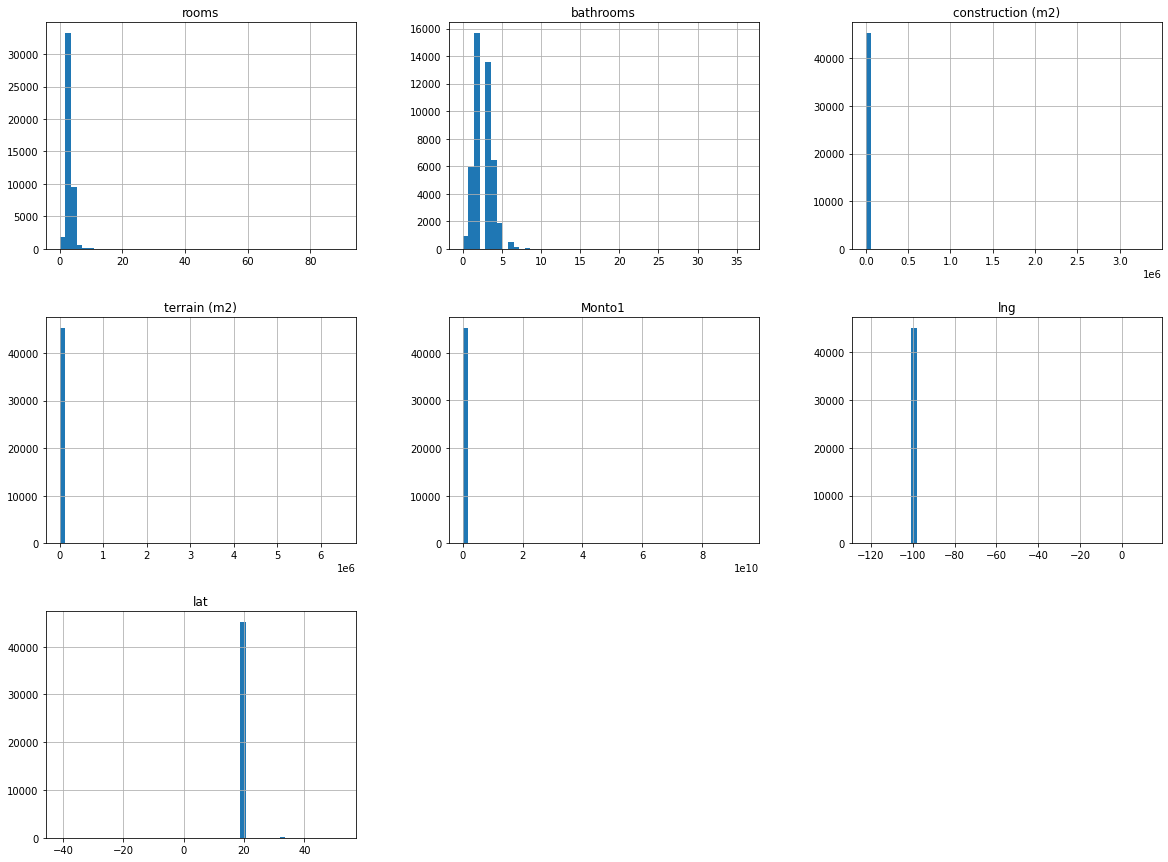

In [6]:
# Creamos un histograma:

# 
Venta[['rooms', 'bathrooms', 'construction (m2)', 'terrain (m2)', 'Monto1', 'lng', 
       'lat']].hist(bins = 50, figsize = (20, 15))

plt.show()

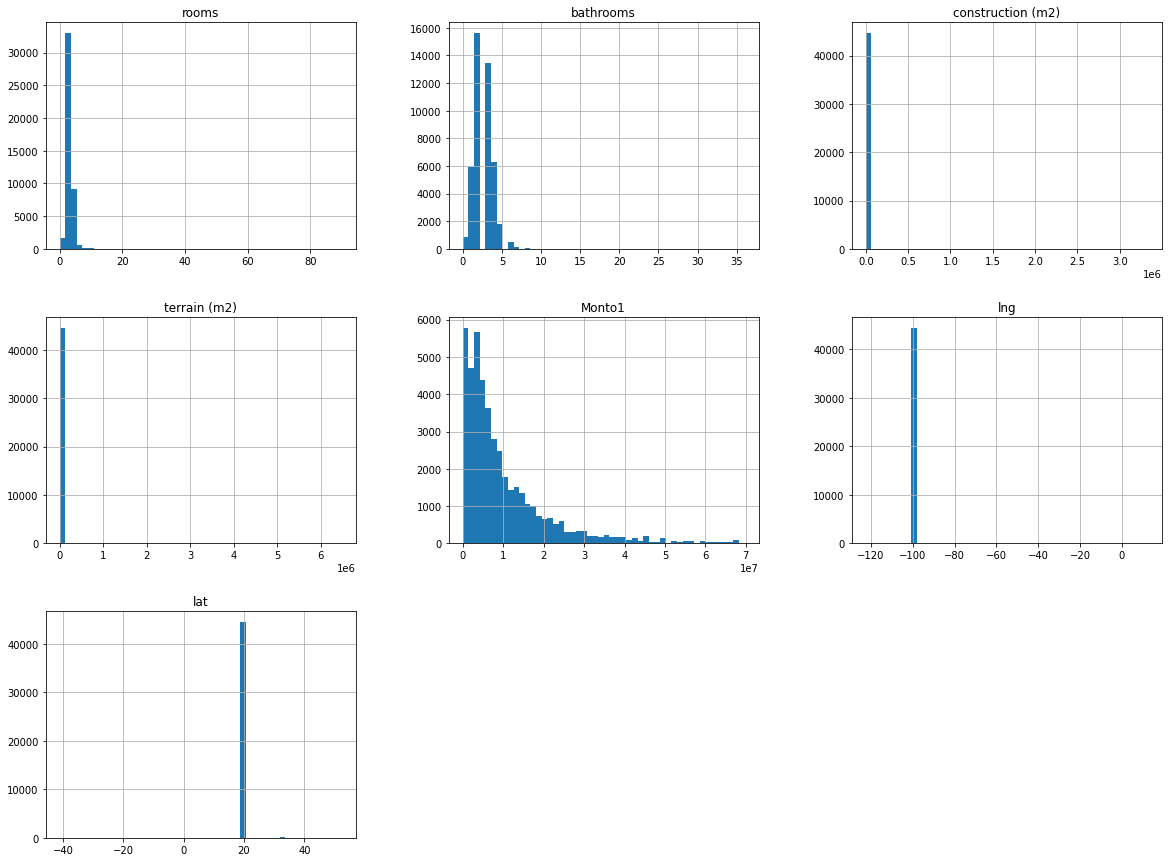

In [7]:
#

Venta_sel = Venta[(Venta['Monto1'] > 1000) & (Venta['Monto1'] < 70000000)]

Venta_sel[['rooms', 'bathrooms', 'construction (m2)', 'terrain (m2)', 'Monto1', 'lng', 
           'lat']].hist(bins = 50, figsize = (20, 15))

plt.show()

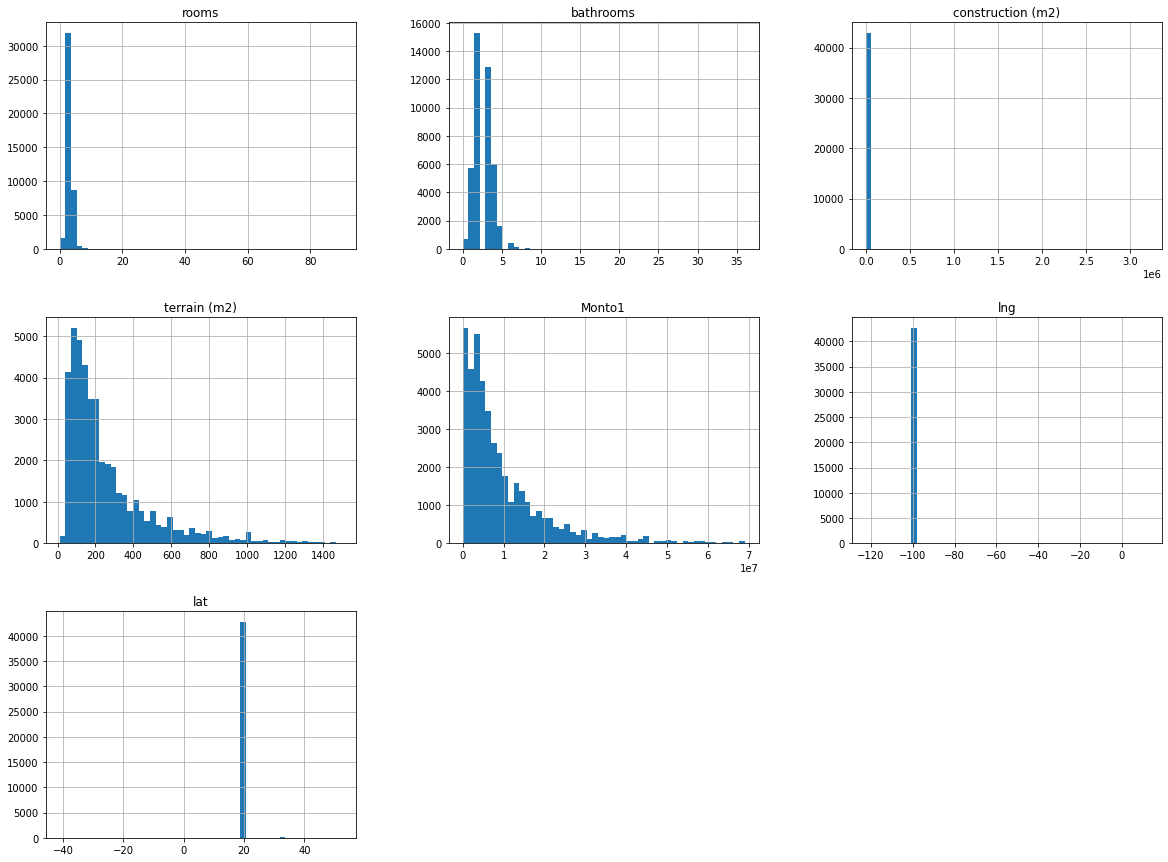

In [8]:
#

Venta_sel = Venta_sel[(Venta_sel['terrain (m2)'] > 10) & (Venta_sel['terrain (m2)'] < 1500)]

Venta_sel[['rooms', 'bathrooms', 'construction (m2)', 'terrain (m2)', 'Monto1', 'lng', 
           'lat']].hist(bins = 50, figsize = (20, 15))

plt.show()

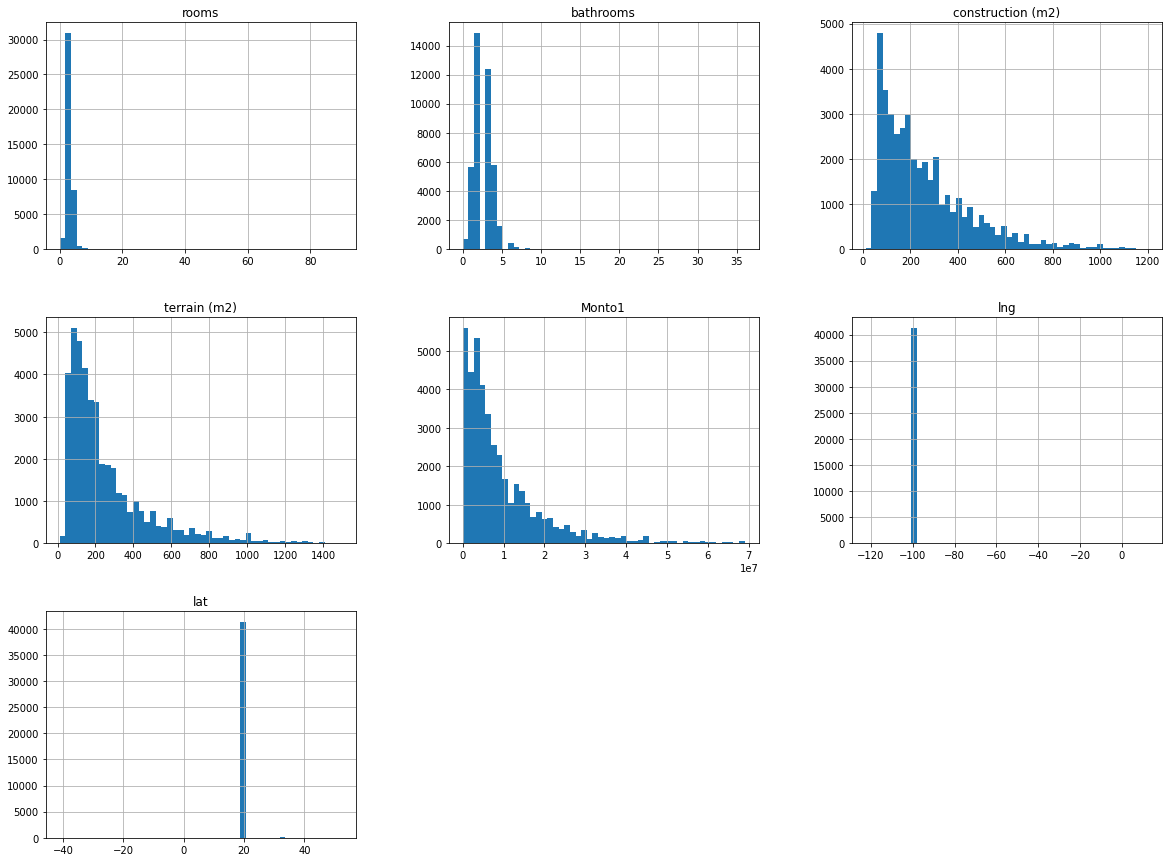

In [9]:
#

Venta_sel = Venta_sel[(Venta_sel['construction (m2)'] > 10) & (Venta_sel['construction (m2)'] < 1200)]

Venta_sel[['rooms', 'bathrooms', 'construction (m2)', 'terrain (m2)', 'Monto1', 'lng', 
           'lat']].hist(bins = 50, figsize = (20, 15))

plt.show()

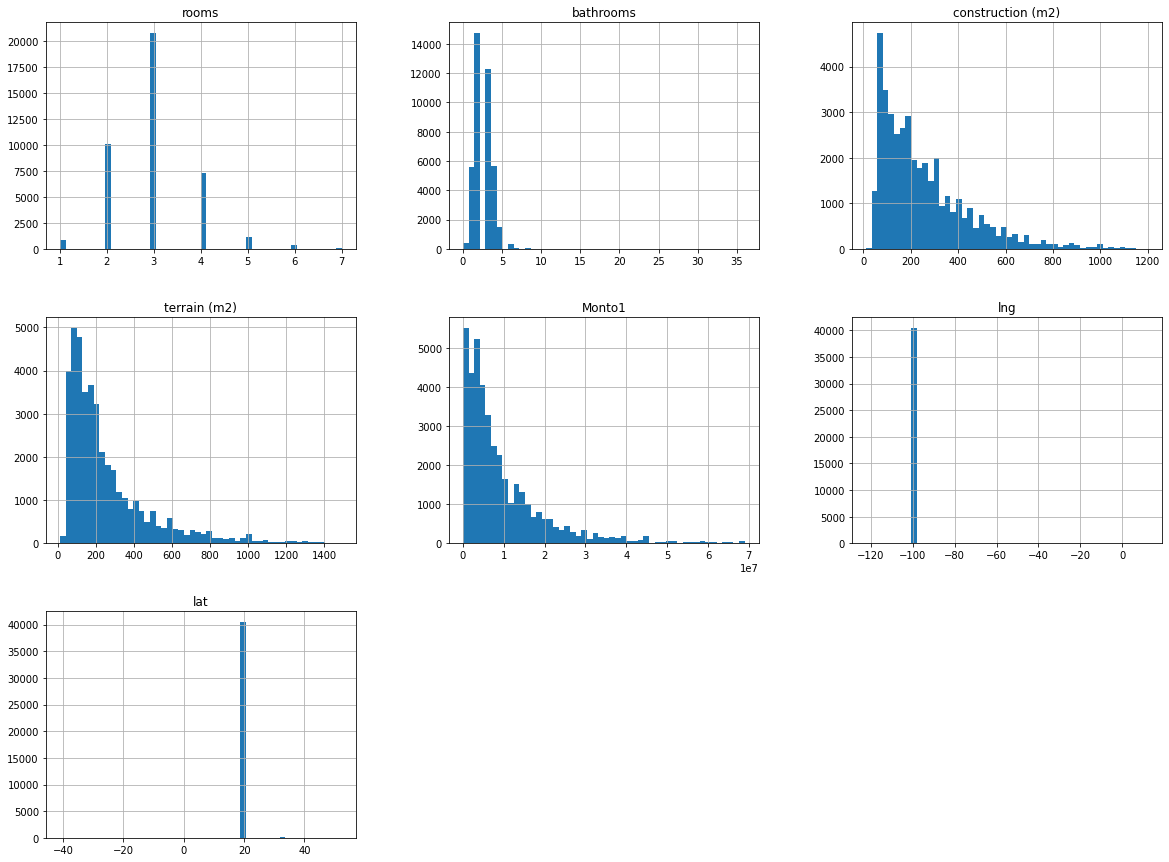

In [10]:
#

Venta_sel = Venta_sel[(Venta_sel['rooms'] > 0) & (Venta_sel['rooms'] < 8)]

Venta_sel[['rooms', 'bathrooms', 'construction (m2)', 'terrain (m2)', 'Monto1', 'lng', 
           'lat']].hist(bins = 50, figsize = (20, 15))

plt.show()

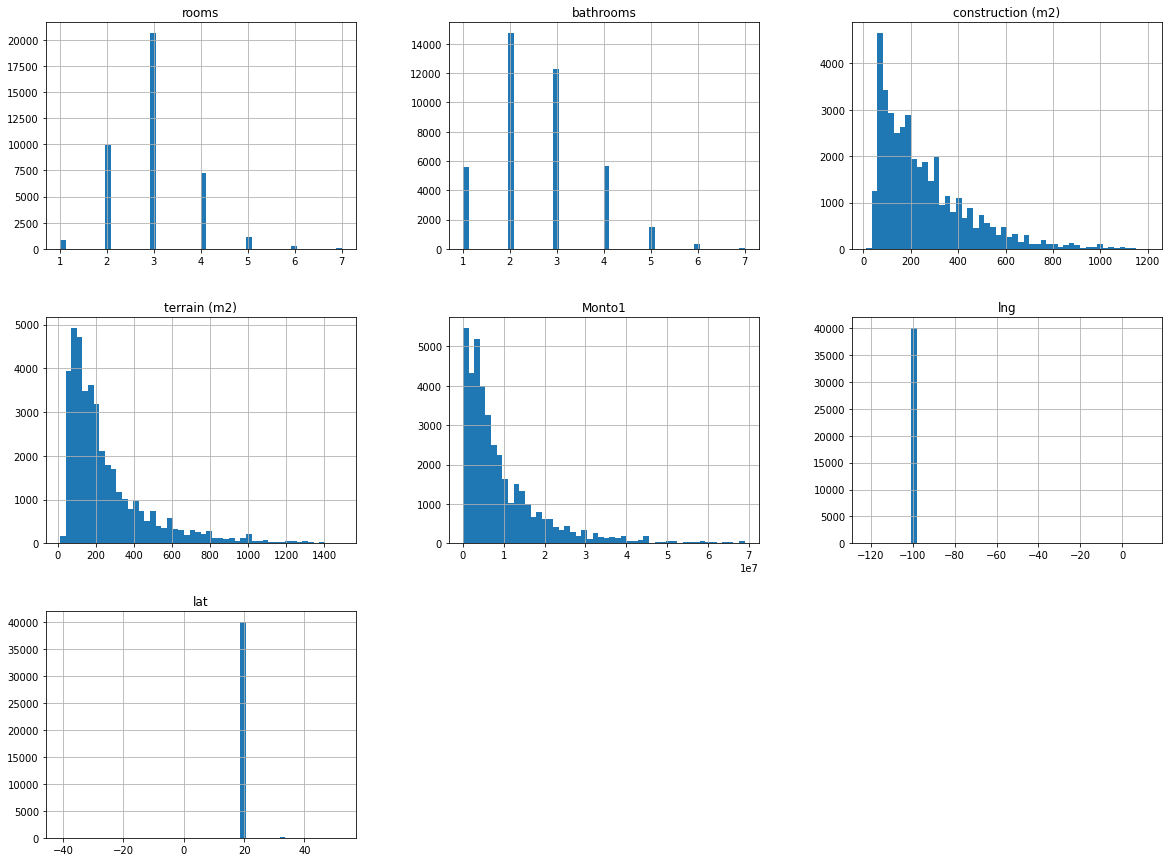

In [11]:
#

Venta_sel = Venta_sel[ (Venta_sel['bathrooms'] > 0) & (Venta_sel['bathrooms'] < 8)]

Venta_sel[['rooms', 'bathrooms', 'construction (m2)', 'terrain (m2)', 'Monto1', 'lng', 
           'lat']].hist(bins = 50, figsize = (20, 15))

plt.show()

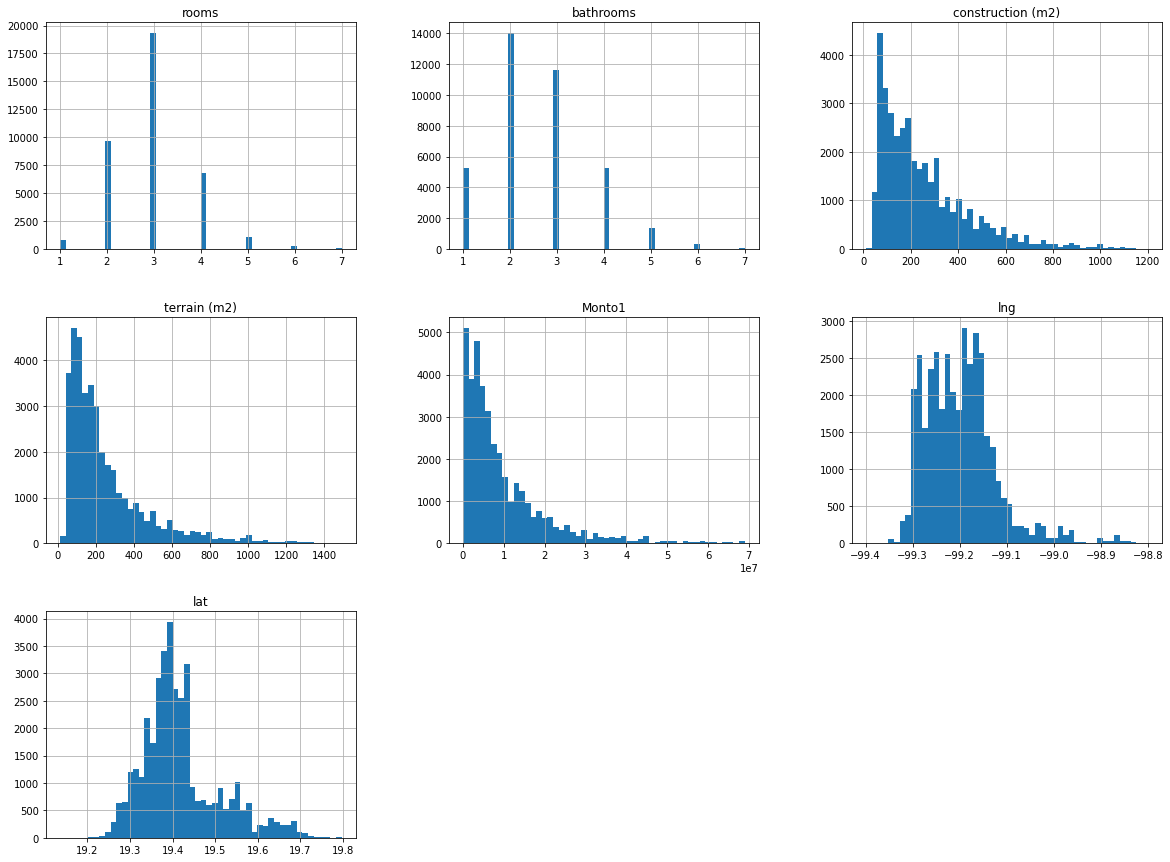

In [12]:
#

Venta_sel = Venta_sel[(Venta_sel['lat'] > 19.1) & (Venta_sel['lat'] < 19.8) & \
                      (Venta_sel['lng'] > - 99.4) & (Venta_sel['lng'] < - 98.8)]

Venta_sel[['rooms', 'bathrooms', 'construction (m2)', 'terrain (m2)', 'Monto1', 'lng', 
           'lat']].hist(bins = 50, figsize = (20, 15))

plt.show()

### En suma:

In [13]:
#

Venta_sel = Venta[ ( (Venta['Monto1'] > 1000) & (Venta['Monto1'] < 70000000) ) & \
                   ( (Venta_sel['terrain (m2)'] > 10) & (Venta_sel['terrain (m2)'] < 1500) ) & \
                   ( (Venta_sel['construction (m2)'] > 10) & (Venta_sel['construction (m2)'] < 1200) ) & \
                   ( (Venta_sel['rooms'] > 0) & (Venta_sel['rooms'] < 8) ) & \
                   ( (Venta_sel['bathrooms'] > 0 ) & (Venta_sel['bathrooms'] < 8) )& \
                   ( (Venta_sel['lat'] > 19.1) & (Venta_sel['lat'] < 19.8) ) & \
                   ( (Venta_sel['lng'] > - 99.4) & (Venta_sel['lng'] < - 98.8) ) ]

In [14]:
#

Venta.shape, Venta_sel.shape

((45324, 24), (37948, 24))

In [15]:
#

Venta_sel['Price_m2'] = Venta_sel['Monto1'] / Venta_sel['construction (m2)']

## Visualización

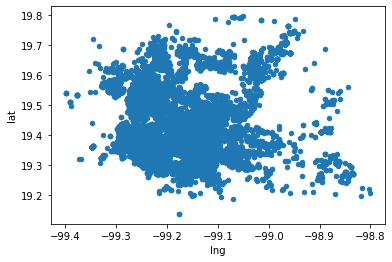

In [16]:
#

Venta_sel.plot(kind = 'scatter', x = 'lng', y = 'lat')

plt.show()

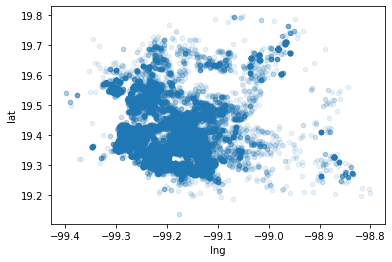

In [17]:
#

Venta_sel.plot(kind = 'scatter', x = 'lng', y = 'lat', alpha = 0.1)

plt.show()

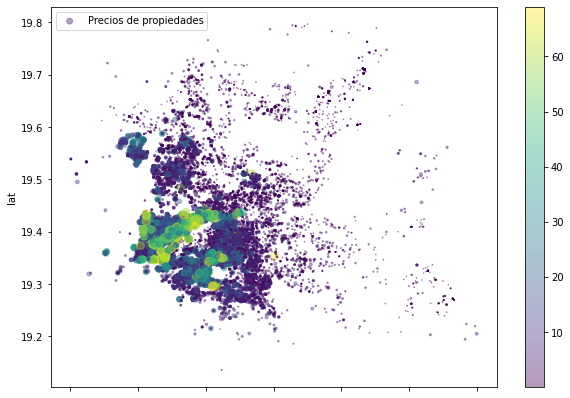

In [18]:
#

Venta_sel.plot( kind = 'scatter', x = 'lng', y = 'lat', alpha = 0.4,
                s = Venta_sel['Monto1']/1000000, label = "Precios de propiedades", 
                figsize = (10, 7),
                c = Venta_sel['Monto1']/1000000,  colorbar = True)

plt.legend()

plt.show()

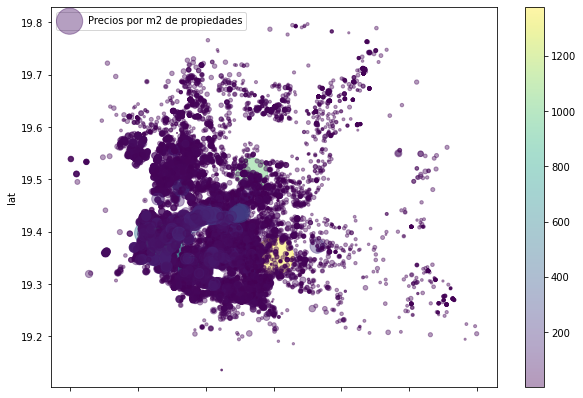

In [19]:
#

Venta_sel.plot( kind = 'scatter', x = 'lng', y = 'lat', alpha = 0.4,
                s = Venta_sel['Price_m2']/1000, label = "Precios por m2 de propiedades", 
                figsize = (10, 7),
                c = Venta_sel['Price_m2']/1000,  colorbar = True)

plt.legend()

plt.show()

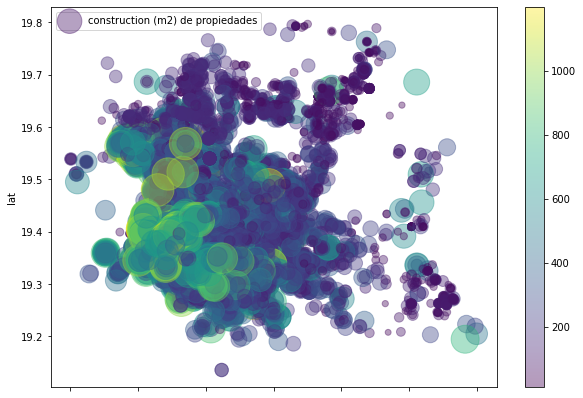

In [20]:
#

Venta_sel.plot( kind = 'scatter', x = 'lng', y = 'lat', alpha = 0.4,
                s = Venta_sel['construction (m2)'], label = "construction (m2) de propiedades", 
                figsize = (10, 7),
                c = Venta_sel['construction (m2)'],  colorbar = True)

plt.legend()

plt.show()

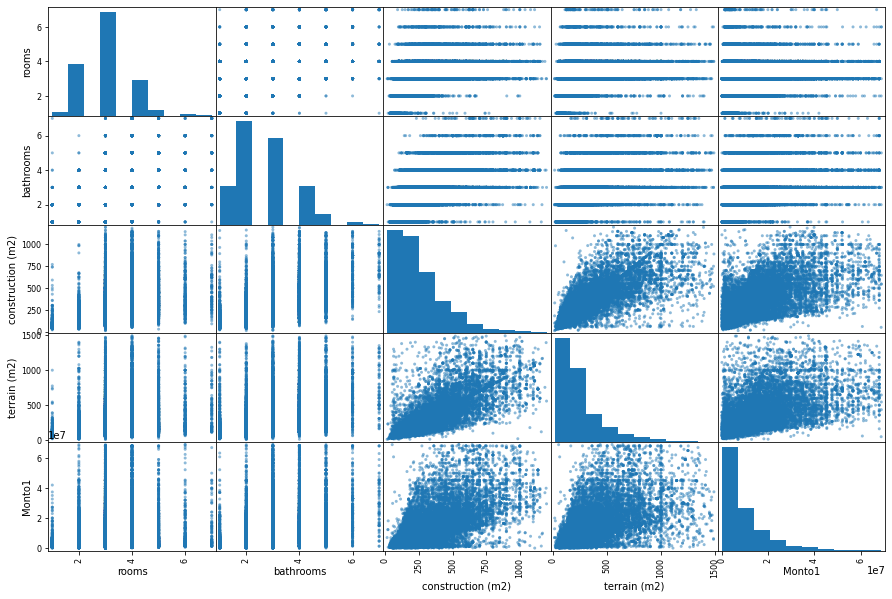

In [21]:
#
attributes = ['rooms', 'bathrooms', 'construction (m2)', 'terrain (m2)', 'Monto1']

scatter_matrix(Venta_sel[attributes], figsize = (15, 10))

plt.show()

In [22]:
# Save 

Venta_sel.to_csv('Venta_sel.csv', sep =',', encoding = 'utf-8-sig', index = False)

## El Modelo

In [23]:
#

Venta_sel['construction'] = Venta_sel['construction (m2)']
Venta_sel['terrain'] = Venta_sel['terrain (m2)']

# Formulamos la regresión

formula = 'Monto1 ~ rooms + bathrooms + construction + terrain + lat + lng'

results = ols(formula, Venta_sel).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Monto1   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     8019.
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:18:06   Log-Likelihood:            -6.5228e+05
No. Observations:               37948   AIC:                         1.305e+06
Df Residuals:                   37941   BIC:                         1.305e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.908e+08   5.38e+07     -7.260   

In [24]:
# Definamos la matriz X y el vector Y

X = Venta_sel[["rooms", "bathrooms", "construction (m2)", "terrain (m2)", 'lat', 'lng']]

y = Venta_sel["Monto1"].values.reshape(-1, 1)

X.shape, y.shape

((37948, 6), (37948, 1))

In [25]:
# Separamos los datos en prueba y entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)

In [26]:
#

X_train.shape, X_test.shape, 28461/(28461+9487)

((28461, 6), (9487, 6), 0.75)

In [27]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [28]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [29]:
# Create a LinearRegression model and fit it to the scaled training data

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [30]:
# Extract coefficients form regression
# Venta_sel[["rooms", "bathrooms", "construction (m2)", "terrain (m2)", 'lat', 'lng']]

model.intercept_, model.coef_

(array([-6.33956895e-16]),
 array([[-0.21598639,  0.10729747,  0.52690458,  0.24436731, -0.06588256,
         -0.03924492]]))

In [31]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Obs: You can predict values of X training and testing data using the model.predict() method on a fitted model

predictions = model.predict(X_test_scaled)
predictions

array([[-0.49159842],
       [ 0.99201205],
       [ 0.4614573 ],
       ...,
       [-0.53567438],
       [-0.57338522],
       [ 1.05788286]])

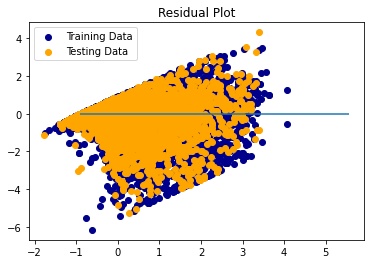

In [32]:
# PLOT

plt.scatter( model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, 
             c = "darkblue", label = "Training Data" )

plt.scatter( model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, 
             c = "orange", label = "Testing Data" )

plt.legend()

plt.hlines( y = 0, xmin = y_test_scaled.min(), xmax = y_test_scaled.max() )

plt.title("Residual Plot")

plt.show()

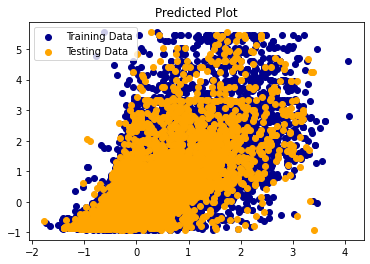

In [33]:
# PLOT

plt.scatter( model.predict(X_train_scaled), y_train_scaled, 
             c = "darkblue", label = "Training Data" )

plt.scatter( model.predict(X_test_scaled), y_test_scaled, 
             c = "orange", label = "Testing Data" )

plt.legend()

plt.title("Predicted Plot")

plt.show()

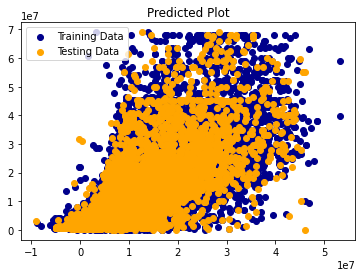

In [34]:
# PLOT Re-Scaled Data

plt.scatter( y_scaler.inverse_transform(model.predict(X_train_scaled)), 
             y_scaler.inverse_transform(y_train_scaled), 
             c = "darkblue", label = "Training Data" )

plt.scatter( y_scaler.inverse_transform(model.predict(X_test_scaled)), 
             y_scaler.inverse_transform(y_test_scaled), 
             c = "orange", label = "Testing Data" )

plt.legend()

plt.title("Predicted Plot")

plt.show()

In [35]:
# Compare R2:

model.score(X_train_scaled, y_train_scaled), model.score(X_test_scaled, y_test_scaled)

(0.5608655950108796, 0.5533925832124309)

In [36]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
# When alpha = 0, the objective is equivalent to ordinary least squares, 
# solved by the LinearRegression object. 
# For numerical reasons, using alpha = 0 with the Lasso object is not advised. 
# Instead, you should use the LinearRegression object.

lasso = Lasso( alpha = 0.01 )
lasso.fit(X_train_scaled, y_train_scaled)

Lasso(alpha=0.01)

In [37]:
# Extract coefficients form lasso regression Vs linear regression
# Venta_sel[["rooms", "bathrooms", "construction (m2)", "terrain (m2)", 'lat', 'lng']]

lasso.intercept_, lasso.coef_, model.intercept_, model.coef_

(array([-6.60562337e-16]),
 array([-0.18965564,  0.09134169,  0.51730024,  0.24173297, -0.05787871,
        -0.03729142]),
 array([-6.33956895e-16]),
 array([[-0.21598639,  0.10729747,  0.52690458,  0.24436731, -0.06588256,
         -0.03924492]]))

In [38]:
#

predictions = lasso.predict(X_test_scaled)

predictions

array([-0.49637681,  0.99260116,  0.47020054, ..., -0.51888741,
       -0.5538748 ,  1.03354671])

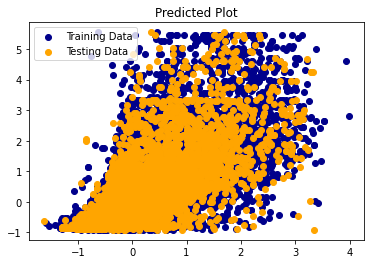

In [39]:
# PLOT

plt.scatter( lasso.predict(X_train_scaled), y_train_scaled, 
             c = "darkblue", label = "Training Data" )

plt.scatter( lasso.predict(X_test_scaled), y_test_scaled, 
             c = "orange", label = "Testing Data" )

plt.legend()

plt.title("Predicted Plot")

plt.show()

In [43]:
# Compare R2:

lasso.score(X_train_scaled, y_train_scaled), lasso.score(X_test_scaled, y_test_scaled)

(0.5602206592954861, 0.5528829551298318)

In [44]:
#

model.score(X_train_scaled, y_train_scaled), model.score(X_test_scaled, y_test_scaled)

(0.5608655950108796, 0.5533925832124309)

In [45]:
# use automatically configured the lasso regression algorithm

# define model evaluation method
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

# define model
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)

# fit model
model.fit(X_train_scaled, y_train_scaled)

# summarize chosen configuration
print('alpha: %f' % model.alpha_)

alpha: 0.000000
